In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import pandas as pd
import networkx as nx
import tensorflow as tf
import numpy as np
from utils import predict

In [2]:
species_features_dummy = pd.read_csv("./data/species_features.csv.gz", index_col=0)
molecule_features_dummy = pd.read_csv("./data/molecule_features.csv.gz", index_col=0).astype("int8")
df_agg = pd.read_csv("./data/lotus_agg_test.csv.gz", index_col=0)

In [3]:
rdkit = pd.read_csv("./data/mol_dummy_rdkit.csv.gz", index_col=0).astype('int8')
molecule_features_dummy = molecule_features_dummy.merge(rdkit,
                                                        left_index=True,
                                                        right_index=True)

In [4]:
g_train = nx.read_graphml("./graph/train_graph.gml")
g = nx.read_graphml("./graph/test_graph.gml")
g  = nx.create_empty_copy(g)
g_merged = nx.compose(g_train, g)

In [5]:
df_agg_train = pd.read_csv("./data/lotus_agg_train.csv.gz", index_col=0)

In [6]:
species_feat = species_features_dummy[species_features_dummy.index.isin(df_agg.organism_name)]
molecule_feat = molecule_features_dummy[molecule_features_dummy.index.isin(df_agg.structure_smiles_2D)]

In [7]:
species_unique_to_test_set = df_agg[~df_agg.organism_name.isin(df_agg_train.organism_name)]
molecules_unique_to_test_set = df_agg[~df_agg.structure_smiles_2D.isin(df_agg_train.structure_smiles_2D)]

In [8]:
model_m_to_s = tf.keras.models.load_model("./model/gbif_batch_128_layer_1024_m_to_s", compile=True)
model_s_to_m = tf.keras.models.load_model("./model/gbif_batch_128_layer_1024_s_to_m", compile=True)

In [9]:
data = pd.DataFrame(df_agg[['structure_smiles_2D', 'organism_name']].to_numpy(),
                    columns=['molecule', 'species'])

In [10]:
#out = predict(g_train, model_m_to_s, model_s_to_m, data, molecule_features_dummy, species_features_dummy)

In [11]:
import matplotlib.pyplot as plt
plt.hist(out.prob)

NameError: name 'out' is not defined

In [ ]:
sum(out.prob>0.5)/len(out)

In [ ]:
out[out.model!='both_known']

In [ ]:
data_2 = pd.DataFrame(
    molecules_unique_to_test_set[['organism_name', 'structure_smiles_2D']].values,
    columns=['species', 'molecule'])

In [ ]:
data_2

In [ ]:
out_2 = predict(g_train, model_m_to_s, model_s_to_m,
                data_2,
                molecule_features_dummy,
                species_features_dummy
               )

In [ ]:
plt.hist(out_2.prob)

In [20]:
g_test = nx.read_graphml("./graph/test_graph.gml")
g_lotus = nx.compose(g_train, g_test)

In [21]:
sku = pd.concat([df_agg, df_agg_train])

In [22]:
sp = 'Homo sapiens'
data_3 = pd.DataFrame(
    {'molecule': list(set(molecule_features_dummy.index)-set(sku[sku.organism_name==sp].structure_smiles_2D)),
     'species': sp})

In [23]:
data_3

,molecule,species
0,C=C1C(=O)OC2C3=C(CO)CCC(OC(=O)C4(C)CO4)C3(C)CCC12,Homo sapiens
1,C=CC1C2CCC3(O)C(C)(CCC(O)C3(C)C(=O)O)C2CCC1(O)CCl,Homo sapiens
2,C=C1C2CCC3(C1O)C1CC4C5(C)CCCC4(C1N(CC)C5)C3C2,Homo sapiens
3,CC1OC(OC2C(C)OC(OC3C(O)CC(OC4C(O)C(OC5C(C)OC(O...,Homo sapiens
4,O=C(C=Cc1ccc(O)c(O)c1)OCCc1ccccc1,Homo sapiens
...,...,...
146538,CC(C=CC1(O)C(C)CC(=O)CC1(C)C)OC1OC(COC2OCC(O)C...,Homo sapiens
146539,CC(CCC1(O)OC2CC3C4CCC5CC(OC6OC(CO)C(OC7OC(CO)C...,Homo sapiens
146540,CCCCCC=CCC=CCCCCCCCCCCCC(=O)O,Homo sapiens
146541,C=CCc1cc(-c2cc(C(OC)C(O)CO)ccc2O)ccc1O,Homo sapiens


In [24]:
out_3 = predict(g_lotus, model_m_to_s, model_s_to_m,
                data_3,
                molecule_features_dummy,
                species_features_dummy
               )

Checking which model should be used for each row...
Adding missing nodes to the graph...
Converting NetwrokX to Stellargraph...
StellarDiGraph: Directed multigraph
 Nodes: 184194, Edges: 869484

 Node types:
  molecule: [147747]
    Features: float32 vector, length 1051
    Edge types: molecule-present_in->species
  species: [36447]
    Features: float32 vector, length 69
    Edge types: species-has->molecule

 Edge types:
    species-has->molecule: [434742]
        Weights: all 1 (default)
        Features: none
    molecule-present_in->species: [434742]
        Weights: all 1 (default)
        Features: none
Creating 'forward', 'backward' flow for KNOWN molecule AND species...
Predict both : running 'forward' predictions
144/144 [==============================] - 29s 203ms/step
Predict both : running backward prediction...
144/144 [==============================] - 29s 202ms/step


(array([9399., 5357., 4090., 3228., 2868., 2552., 2387., 2092., 2077.,
        1815., 1720., 1577., 1561., 1489., 1398., 1400., 1363., 1246.,
        1175., 1243., 1216., 1151., 1137., 1053., 1028., 1048.,  983.,
        1005.,  955.,  915.,  931.,  916.,  862.,  825.,  860.,  874.,
         826.,  795.,  770.,  809.,  717.,  784.,  760.,  729.,  728.,
         751.,  693.,  718.,  698.,  643.,  655.,  651.,  674.,  675.,
         671.,  654.,  635.,  608.,  626.,  659.,  607.,  586.,  596.,
         570.,  576.,  592.,  597.,  562.,  587.,  606.,  539.,  557.,
         524.,  552.,  582.,  523.,  558.,  503.,  552.,  541.,  582.,
         521.,  529.,  549.,  536.,  552.,  558.,  498.,  518.,  511.,
         523.,  525.,  521.,  558.,  526.,  518.,  557.,  502.,  499.,
         533.,  524.,  515.,  464.,  493.,  523.,  479.,  502.,  483.,
         477.,  477.,  467.,  427.,  463.,  505.,  454.,  414.,  445.,
         434.,  401.,  399.,  404.,  404.,  420.,  412.,  413.,  398.,
      

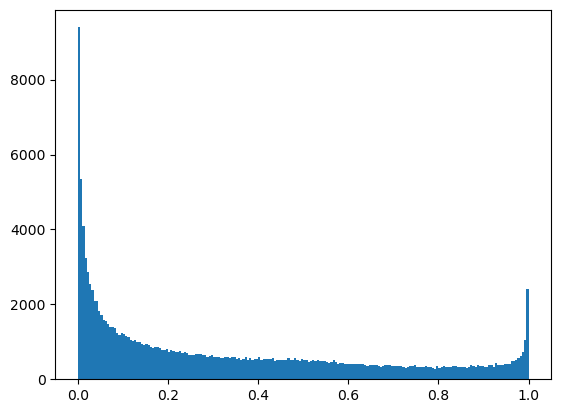

In [25]:
plt.hist(out_3.prob, bins=200)

In [50]:
out_3[out_3.prob>0.98]

,molecule,species,model,prob
32,CSCCC(N)C(=O)NC(CO)C(=O)O,Homo sapiens,both_known,0.996110
48,CCCCC=CCCCCCCCCC(=O)O,Homo sapiens,both_known,0.999880
182,CC1=CCCC(C)(O)C=CC(C(C)C)CC1,Homo sapiens,both_known,0.988693
201,O=C(O)C=CC=CCCC=CC=CC(=O)O,Homo sapiens,both_known,0.999160
285,CCCCC(O)C#CC(O)CCCCCCCC(=O)O,Homo sapiens,both_known,0.984397
...,...,...,...,...
146475,CCCCCCCCCCCCCC=CC(O)C(COP(=O)([O-])OCC[N+](C)(...,Homo sapiens,both_known,0.991368
146510,C=C1CC23CC1CC(O)C2C1(C)CCCC(C)(C(=O)O)C1C3C(=O)O,Homo sapiens,both_known,0.981750
146511,NC(=O)c1ncn(C2OC(CO)C(O)C2O)n1,Homo sapiens,both_known,0.999173
146533,CSC(=O)c1c(C)c(C)c(O)c(C)c1O,Homo sapiens,both_known,0.987001


# Test 4: let's see if cholesterol is present "everywhere"


In [29]:
mol = 'CC(C)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C'
data_4 = pd.DataFrame(
    {'molecule': mol,
     'species': list(set(species_features_dummy.index)-set(sku[sku.structure_smiles_2D==mol].organism_name))})

In [30]:
data_4

,molecule,species
0,CC(C)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C,Ravenia spectabilis
1,CC(C)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C,Welwitschia mirabilis
2,CC(C)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C,Solanum crinitum
3,CC(C)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C,Nocardiopsis
4,CC(C)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C,Asplenium trichomanes
...,...,...
35925,CC(C)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C,Amauroascus
35926,CC(C)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C,Actinoplanes deccanensis
35927,CC(C)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C,Persicaria glabra
35928,CC(C)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C,Onobrychis saravschanica


In [31]:
out_4 = predict(g_lotus, model_m_to_s, model_s_to_m,
                data_4,
                molecule_features_dummy,
                species_features_dummy
               )

Checking which model should be used for each row...
Adding missing nodes to the graph...
Converting NetwrokX to Stellargraph...
StellarDiGraph: Directed multigraph
 Nodes: 184194, Edges: 869484

 Node types:
  molecule: [147747]
    Features: float32 vector, length 1051
    Edge types: molecule-present_in->species
  species: [36447]
    Features: float32 vector, length 69
    Edge types: species-has->molecule

 Edge types:
    species-has->molecule: [434742]
        Weights: all 1 (default)
        Features: none
    molecule-present_in->species: [434742]
        Weights: all 1 (default)
        Features: none
Creating 'forward', 'backward' flow for KNOWN molecule AND species...
Predict both : running 'forward' predictions
36/36 [==============================] - 6s 166ms/step
Predict both : running backward prediction...
36/36 [==============================] - 6s 173ms/step


(array([   8.,   17.,   26.,   21.,   21.,   21.,   15.,   17.,   19.,
          12.,   10.,   15.,   17.,   28.,   19.,   16.,   20.,   16.,
          16.,   20.,   12.,   18.,   23.,   18.,   27.,   35.,   19.,
          20.,   29.,   23.,   29.,   32.,   30.,   27.,   24.,   31.,
          27.,   34.,   36.,   21.,   36.,   37.,   37.,   38.,   31.,
          30.,   37.,   45.,   43.,   37.,   35.,   32.,   31.,   37.,
          41.,   50.,   34.,   49.,   49.,   49.,   56.,   53.,   52.,
          44.,   45.,   55.,   57.,   51.,   68.,   49.,   48.,   48.,
          67.,   68.,   72.,   65.,   75.,   95.,   77.,   79.,   83.,
          88.,   89.,   91.,   92.,   91.,   90.,   98.,   93.,  117.,
          92.,  123.,  105.,  114.,  103.,  108.,  132.,  134.,  135.,
         141.,  126.,  144.,  140.,  147.,  126.,  162.,  148.,  149.,
         137.,  157.,  153.,  160.,  140.,  145.,  152.,  143.,  173.,
         143.,  146.,  176.,  165.,  184.,  174.,  179.,  176.,  168.,
      

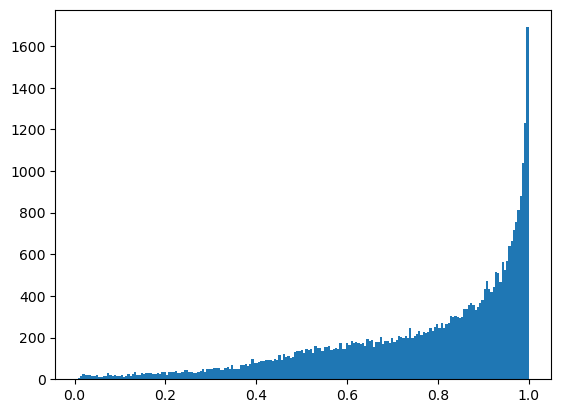

In [34]:
plt.hist(out_4.prob, bins=200)

In [36]:
len(out_4[out_4.prob>0.5])/len(out_4)

0.864013359309769

In [52]:
out_4[out_4.prob>0.95]

,molecule,species,model,prob
2,CC(C)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C,Solanum crinitum,both_known,0.975570
3,CC(C)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C,Nocardiopsis,both_known,0.958463
4,CC(C)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C,Asplenium trichomanes,both_known,0.992359
6,CC(C)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C,Vellozia pusilla,both_known,0.998452
9,CC(C)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C,Diplocarpon alpestre,both_known,0.978656
...,...,...,...,...
35895,CC(C)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C,Cortinarius speciosissimus,both_known,0.975019
35906,CC(C)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C,Iberis umbellata,both_known,0.967330
35909,CC(C)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C,Araucaria cunninghamii,both_known,0.990533
35920,CC(C)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C,Pseudomonas aeruginosa,both_known,0.999593


# Test 5: test with a more rare molecule 

In [40]:
mol = 'CCCCCc1cc(O)c2c(c1)OC(C)(C)C1CCC(C)=CC21'
data_5 = pd.DataFrame(
    {'molecule': mol,
     'species': list(set(species_features_dummy.index)-set(sku[sku.structure_smiles_2D==mol].organism_name))}
)

In [42]:
out_5 = predict(g_lotus, model_m_to_s, model_s_to_m,
                data_5,
                molecule_features_dummy,
                species_features_dummy
               )

Checking which model should be used for each row...
Adding missing nodes to the graph...
Converting NetwrokX to Stellargraph...
StellarDiGraph: Directed multigraph
 Nodes: 184194, Edges: 869484

 Node types:
  molecule: [147747]
    Features: float32 vector, length 1051
    Edge types: molecule-present_in->species
  species: [36447]
    Features: float32 vector, length 69
    Edge types: species-has->molecule

 Edge types:
    species-has->molecule: [434742]
        Weights: all 1 (default)
        Features: none
    molecule-present_in->species: [434742]
        Weights: all 1 (default)
        Features: none
Creating 'forward', 'backward' flow for KNOWN molecule AND species...
Predict both : running 'forward' predictions
36/36 [==============================] - 6s 159ms/step
Predict both : running backward prediction...
36/36 [==============================] - 6s 165ms/step


(array([1.6963e+04, 2.7290e+03, 1.6320e+03, 1.1290e+03, 8.8100e+02,
        7.2800e+02, 5.9200e+02, 4.8400e+02, 4.5000e+02, 4.1100e+02,
        3.6300e+02, 3.6000e+02, 3.2500e+02, 2.8700e+02, 2.7200e+02,
        2.3800e+02, 2.2400e+02, 2.4200e+02, 1.9600e+02, 1.9400e+02,
        1.8300e+02, 1.7800e+02, 1.8500e+02, 2.0500e+02, 1.8600e+02,
        1.7900e+02, 1.4300e+02, 1.6300e+02, 1.4100e+02, 1.2600e+02,
        1.3100e+02, 1.5000e+02, 1.2800e+02, 1.2200e+02, 1.1600e+02,
        1.1400e+02, 1.1800e+02, 1.3100e+02, 1.0900e+02, 1.1100e+02,
        8.2000e+01, 9.9000e+01, 9.5000e+01, 9.2000e+01, 9.0000e+01,
        9.1000e+01, 7.8000e+01, 9.3000e+01, 8.2000e+01, 8.0000e+01,
        7.6000e+01, 7.4000e+01, 7.0000e+01, 7.1000e+01, 9.0000e+01,
        6.9000e+01, 6.1000e+01, 6.5000e+01, 6.7000e+01, 6.4000e+01,
        6.9000e+01, 5.6000e+01, 6.4000e+01, 6.5000e+01, 5.9000e+01,
        4.7000e+01, 3.5000e+01, 5.7000e+01, 4.9000e+01, 5.7000e+01,
        4.6000e+01, 5.3000e+01, 5.8000e+01, 3.30

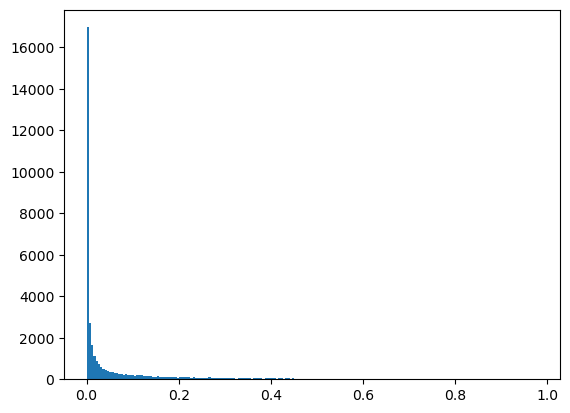

In [45]:
plt.hist(out_5.prob, bins=200)

In [49]:
out_5[out_5.prob>0.98]

,molecule,species,model,prob
